# Instancia de librarias

In [1]:
import pandas as pd
import numpy as np
import datetime as dt

import scipy.stats as stats
import statistics

import warnings
warnings.filterwarnings('ignore')

# Formato de visualización por centenas
pd.options.display.float_format = '{:,.2f}'.format

print("Setup complete")

Setup complete


# Importación de datos

In [2]:
path = r'data/Walmart_Store_sales.csv'
wall_data = pd.read_csv(path, header=0, encoding='utf-8')

# Análisis exploratorio

In [3]:
print("Número de observaciones:", wall_data.shape[0])
print("Número de variables:", wall_data.shape[1])
print("Variables",wall_data.keys())

Número de observaciones: 6435
Número de variables: 8
Variables Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')


In [4]:
wall_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [5]:
# Establecer el número de filas de la muestra
muestra = int(wall_data.shape[0]*.60)

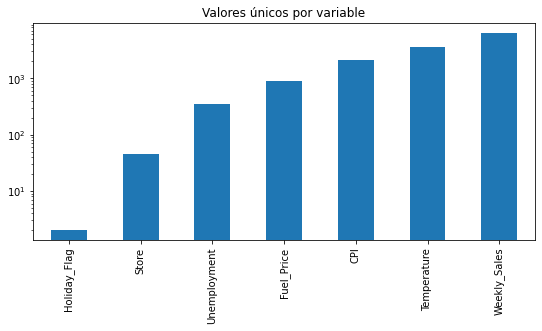

In [5]:
wall_data.value_counts(wall_data.dtypes)
unq_val = wall_data.select_dtypes(include='number').nunique().sort_values()
unq_val.plot.bar(logy=True, figsize=(9,4),title="Valores únicos por variable");

In [4]:
wall_data.sample(10,random_state=muestra)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
5306,38,21-05-2010,"340,497.08",0,76.20,3.12,126.18,14.10
2441,18,16-04-2010,"1,135,577.62",0,50.26,2.88,131.98,9.27
5183,37,08-10-2010,"524,483.65",0,66.34,2.63,210.51,8.48
897,7,05-11-2010,"480,512.44",0,49.44,2.73,191.00,9.14
3194,23,07-01-2011,"1,122,034.48",0,27.81,3.19,132.88,5.11
4654,33,05-08-2011,"242,456.39",0,96.93,3.80,129.18,8.44
3394,24,10-02-2012,"1,403,460.87",1,33.82,3.83,137.17,8.66
2580,19,19-03-2010,"1,332,940.35",0,43.74,2.96,131.82,8.35
2681,19,24-02-2012,"1,352,470.09",0,33.91,3.92,137.34,7.94
4674,33,23-12-2011,"256,235.19",0,53.39,3.54,129.98,8.01


In [7]:
wall_data.columns = ["num_tienda","fecha","vta_semana","dia_feriado","temperatura","precio_gasolina_reg","ipc","tasa_desempleo"]

In [8]:
wall_data.head()

,num_tienda,fecha,vta_semana,dia_feriado,temperatura,precio_gasolina_reg,ipc,tasa_desempleo
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [9]:
# la temperatura esta en °F
print("Max: ",wall_data['temperatura'].max(),"Min: ",wall_data['temperatura'].min())

Max:  100.14 Min:  -2.06


In [10]:
# El precio de la gasolina por region es en galones
print("Max: ",wall_data['precio_gasolina_reg'].max(),"Min: ",wall_data['precio_gasolina_reg'].min())

Max:  4.468 Min:  2.472


In [11]:
# la temperatura se deja en °C
wall_data['temperatura'] = (wall_data['temperatura']-32)*(5/9)
wall_data['temperatura'].head()

0    5.727778
1    3.616667
2    4.405556
3    8.127778
4    8.055556
Name: temperatura, dtype: float64

In [12]:
# El precio de la gasolina se deja en Dolares
wall_data['precio_gasolina_reg'] = (wall_data['precio_gasolina_reg'] / 3.785412)
wall_data['precio_gasolina_reg'].head()

# Posiblemente se pueda consumir un api que le pase la fecha y proporcione el precio del dolar ese día

0    0.679450
1    0.673110
2    0.664129
3    0.676545
4    0.693452
Name: precio_gasolina_reg, dtype: float64

In [13]:
# fecha - Cambio de tipo str a date
# wall_data['fecha']
wall_data['fecha'] = pd.to_datetime(wall_data['fecha'],format="%d-%m-%Y", dayfirst=True)

In [14]:
wall_data['fecha'] # año - mes - dia

0      2010-02-05
1      2010-02-12
2      2010-02-19
3      2010-02-26
4      2010-03-05
          ...    
6430   2012-09-28
6431   2012-10-05
6432   2012-10-12
6433   2012-10-19
6434   2012-10-26
Name: fecha, Length: 6435, dtype: datetime64[ns]

In [15]:
pd.value_counts(wall_data.dtypes)

float64           5
int64             2
datetime64[ns]    1
dtype: int64

# Corroboración de valores ausentes

In [16]:
wall_data.isna().sum()

num_tienda             0
fecha                  0
vta_semana             0
dia_feriado            0
temperatura            0
precio_gasolina_reg    0
ipc                    0
tasa_desempleo         0
dtype: int64

# Verificando periodicidad de fechas

In [17]:
# wall_data[wall_data['fecha']=="2010-05-02"] # Inicio del registro de semana viernes
# wall_data[wall_data['fecha'] == "2012-08-31"] # Registro de última semana viernes
# wall_data[wall_data['fecha'] == "2012-11-01"] # No hay registro
wall_data.groupby(['fecha']).size() # 45 (tiendas)*143 = 6435 registros

fecha
2010-02-05    45
2010-02-12    45
2010-02-19    45
2010-02-26    45
2010-03-05    45
              ..
2012-09-28    45
2012-10-05    45
2012-10-12    45
2012-10-19    45
2012-10-26    45
Length: 143, dtype: int64

In [18]:
# Todos los viernes de cada semana se registran ventas.

# Trimestre strim
# x enero x - febrero-marzo, abril-mayo-junio, julio-agosto-septiembre, octubre-noviembre-diciembre (2010)
# //enero-febrero-marzo, abril-mayo-junio, julio-agosto-septiembre, // octubre-noviembre-diciembre (2011)
# //enero-febrero-marzo, abril-mayo-junio, julio-agosto-septiembre, // octubre x noviembre-diciembre x (2012)

# No hay valores registrados para el mes de enero de 2010 pero sí para 2011 y 2012.
# No hay valores de los meses de noviembre y diciembre de 2012.

# Se sugiere hacer una segmentación de los trimestres: 1, 2 y 3 de los años 2011 y 2012. Sin tomar en cuenta el 4 trimestre
# octubre-noviembre-diciembre. 

# O un análisis trimestral 2 y 3 de todos los años de los siguientes meses:
# abril-mayo-junio, julio-agosto-septiembre (2010)
# abril-mayo-junio, julio-agosto-septiembre (2011)
# abril-mayo-junio, julio-agosto-septiembre (2012)

# O un análisis bimestral de los mismos años para los siguientes meses:
# enero-febrero, marzo-abril-,mayo-junio, julio-agosto, septiembre-octubre (2011)
# enero-febrero, marzo-abril-,mayo-junio, julio-agosto, septiembre-octubre (2012)


# Días festivos
# Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13       1-Trimestre
# Labour Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13         3-Trimestre
# Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13    4-Trimestre
# Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13       4-Trimestre

In [38]:
# Función que define maximos y minimos de venta
def vta_max_min (df):
    vta_max = df[df['vta_semana'] == df['vta_semana'].max()].iloc[:,[0,2]] # .iloc[:,0:2] Seleccionan el número de columnas
    vta_min = df[df['vta_semana'] == df['vta_semana'].min()].iloc[:,[0,2]]
    return(vta_max,vta_min)

# Función que separa fechas por periodos de tiempo
def periodo_tiempo (df,f1,f2):
    periodo = df[(df['fecha']>=f1) & (df['fecha']<=f2)].iloc[:,0:4] 
    return periodo

# Función de desviación estandar
def des_std (df):
    std_des = df.iloc[:,[0,2]].groupby(['num_tienda']).aggregate(['std','mean']).reset_index()\
    .sort_values(by=('vta_semana', 'std'),ascending=False).iloc[0:1,:]
    return std_des

# Función que obtiene la tasa de ganancia
def tasa_ganancia (per1,per2):
    p1 = per1.groupby('num_tienda')[['vta_semana']].aggregate([sum])
    p2 = per2.groupby('num_tienda')[['vta_semana']].aggregate([sum])
    tg = (((p2-p1)/ p1) * 100 ).reset_index()
    return tg
# tasa_ganancia(per1,per2)

# Funciónes que construye el dataframe de las tasas de crecimiento
def df_tasa_1 (a,tg1,n_store = 46):
    df = pd.DataFrame()
    df['tienda'] = range(1,n_store,1)
    df[a]=tg1['vta_semana']
    return df

def df_tasa_2 (a,b,tg1,tg2,n_store=46):
    df = pd.DataFrame()
    df['tienda'] = range(1,n_store,1)
    df[a]=tg1['vta_semana']
    df[b]=tg2['vta_semana']
    return df

def df_tasa_4 (a,b,c,d,tg1,tg2,tg3,tg4,n_store = 46):
    df = pd.DataFrame()
    df['tienda'] = range(1,n_store,1)
    df[a]=tg1['vta_semana']
    df[b]=tg2['vta_semana']
    df[c]=tg3['vta_semana']
    df[d]=tg4['vta_semana']
    return df

# Funciónes que construye el dataframe del total de las tasas de crecimiento en todos los periodos
def total_tasa_2 (a,b,c,d,df,title):
    rate_store = pd.DataFrame(columns=['num_store', title])
    for n in range (1,46,1):
        x = df.iloc[:,[a,b]].groupby(['tienda']).get_group(n).iloc[0,1]
        y = df.iloc[:,[c,d]].groupby(['tienda']).get_group(n).iloc[0,1]
        tasa_tienda = x+y # promedio TODO
        new_row = {'num_store':str(n),title:round(tasa_tienda,2)}
        rate_store = rate_store.append(new_row,ignore_index=True)
    rate_store = rate_store.sort_values(by = title,ascending= False)
    return rate_store
# total_tasa_2(0,1,2,3,tiendas_crec_trim,'title_rate')

def total_tasa_4 (a,b,c,d,e,f,df,title):
    rate_store = pd.DataFrame(columns=['num_store', title])
    for n in range (1,46,1):
        x = df.iloc[:,[a,b]].groupby(['tienda']).get_group(n).iloc[0,1]
        y = df.iloc[:,[c,d]].groupby(['tienda']).get_group(n).iloc[0,1]
        z = df.iloc[:,[e,f]].groupby(['tienda']).get_group(n).iloc[0,1]
        tasa_tienda = x+y+z
        new_row = {'num_store':str(n),title:round(tasa_tienda,2)}
        rate_store = rate_store.append(new_row,ignore_index=True)
    rate_store = rate_store.sort_values(by = title,ascending= False)
    return rate_store
# total_tasa_4(0,1,2,3,4,5,tiendas_crec_trim,'title_rate')


def total_tasa_16 (a,b,c,d,e,f,g,h,i,j,k,l,m,o,p,q,df,title):
    rate_store = pd.DataFrame(columns=['num_store', title])
    for n in range (1,46,1):
        x = df.iloc[:,[a,b]].groupby(['tienda']).get_group(n).iloc[0,1]
        y = df.iloc[:,[c,d]].groupby(['tienda']).get_group(n).iloc[0,1]
        z = df.iloc[:,[e,f]].groupby(['tienda']).get_group(n).iloc[0,1]
        w = df.iloc[:,[g,h]].groupby(['tienda']).get_group(n).iloc[0,1]
        t = df.iloc[:,[i,j]].groupby(['tienda']).get_group(n).iloc[0,1]
        r = df.iloc[:,[k,l]].groupby(['tienda']).get_group(n).iloc[0,1]
        s = df.iloc[:,[m,o]].groupby(['tienda']).get_group(n).iloc[0,1]
        xa = df.iloc[:,[p,q]].groupby(['tienda']).get_group(n).iloc[0,1]
        tasa_tienda = x+y+z+w+t+r+s+xa
        new_row = {'num_store':str(n),title:round(tasa_tienda,2)}
        rate_store = rate_store.append(new_row,ignore_index=True)
    rate_store = rate_store.sort_values(by = title,ascending= False)
    return rate_store

for n, grupo in df.groupby('tienda'): 
    x = grupo.iloc[:,[a,b]].iloc[0,1]
    y = grupo.iloc[:,[a,b]].iloc[0,1]

# total_tasa_16(0,1,2,3,4,5,,6,7,8,9,10,11,12,13,14,15,tiendas_crec_bim_1_5_11_12,'rate_bim_11_12')


## 2011 - 2012 Trimestres 1,2,3

In [20]:
# Definiendo los periodos de tiempo por trimestre o bimestre
trim_11_12 = periodo_tiempo(wall_data,"2011-01-07","2012-09-28")
# trim_11_12

### La tienda con el máximo de ventas registradas es:

In [21]:
vta_max_min(trim_11_12)
# R. La tienda con el mayor monto de ventas es: 4
# la que tiene el menor número de ventas es: 33

(     num_tienda   vta_semana
 527           4 3,676,388.98,
       num_tienda  vta_semana
 4675          33  215,359.21)

### La tienda con la desviación estadar máxima fue:

In [22]:
trim_11_12['vta_semana'].describe()

count       4,095.00
mean    1,041,262.80
std       556,254.58
min       215,359.21
25%       557,193.61
50%       953,533.95
75%     1,424,899.43
max     3,676,388.98
Name: vta_semana, dtype: float64

In [23]:
des_std(trim_11_12)

num_tienda vta_semana             
                     std         mean
13         14 267,113.77 1,944,130.32

## 2012

### Las tiendas con buena tasa de crecimiento trimestral en el 2012 son:

In [24]:
# Trimestres: 
# enero-febrero-marzo     [1]
# abril-mayo-junio        [2]
# julio-agosto-septiembre [3]

trim_1_12 = periodo_tiempo(trim_11_12,"2012-01-06","2012-03-30")
trim_2_12 = periodo_tiempo(trim_11_12,"2012-04-06","2012-06-29")
trim_3_12 = periodo_tiempo(trim_11_12,"2012-07-06","2012-09-28")

# Tasa de crecimiento

tasa_trim_1_2 = tasa_ganancia(trim_1_12,trim_2_12)
tasa_trim_2_3 = tasa_ganancia(trim_2_12,trim_3_12)

# construyendo dataframe de la tasa de crecimiento
tasa_crec_2012 = df_tasa_2("trim_1_2_12","trim_2_3_12",tasa_trim_1_2,tasa_trim_2_3)

# # Ordenando valores de las tasas de crecimiento de forma descendente y guardando en una variable
# .iloc[:,[0,1]] selecciona las columnas de tienda y su tasa de crecimiento del trimestre correspondiente
tasa_crec_1_2_12 = tasa_crec_2012.iloc[:,[0,1]].sort_values(by='trim_1_2_12', ascending=False)
tasa_crec_2_3_12 = tasa_crec_2012.iloc[:,[0,2]].sort_values(by='trim_2_3_12', ascending=False)
# Reindenxando 
tasa_crec_1_2_12.reset_index(drop=True, inplace=True)
tasa_crec_2_3_12.reset_index(drop=True, inplace=True)

tiendas_crec_trim_12 = pd.concat([tasa_crec_1_2_12,tasa_crec_2_3_12],axis=1)
# tiendas_crec_trim_12

# Fuentes consultadas
# Calculo de la Tasa de ganancia
# https://cutt.ly/mNRVAtA
# Definición de la tabla
# https://www.statology.org/cbind-in-python/

In [25]:
tiendas_crec_trim_12.head(5)
# R. En el periodo de crecimiento de los trimestres 2 y 3, las tiendas con mejor tasa son: 7,16,35*.
# La tieda 35 luce con el mejor crecimiento en ambos periodos.

,tienda,trim_1_2_12,tienda,trim_2_3_12
0,23,15.20,7,13.33
1,15,13.31,16,8.49
2,41,12.62,35,4.47
3,25,12.50,26,3.96
4,35,12.40,39,2.48


In [26]:
tiendas_crec_trim_12.tail(5)
# Las tiendas con peor tasa de crecimiento son:

,tienda,trim_1_2_12,tienda,trim_2_3_12
40,43,-1.96,29,-6.37
41,10,-3.02,5,-6.77
42,42,-3.26,36,-7.71
43,7,-6.44,45,-7.79
44,28,-6.82,14,-15.77


In [27]:
rate_store_12 = total_tasa_2(0,1,2,3,tiendas_crec_trim_12,'rate_sem_1_2_3_2012')
rate_store_12.head(5)
# Las tiendas con la mejor tasa de crecimiento son: 35,23,41.

,num_store,rate_sem_1_2_3_2012
34,35,16.86
22,23,16.02
40,41,15.07
25,26,12.94
23,24,11.29


In [28]:
rate_store_12.tail(5)

,num_store,rate_sem_1_2_3_2012
41,42,-6.85
11,12,-7.83
35,36,-8.04
27,28,-9.40
13,14,-13.00


## 2011

### Las tiendas con buena tasa de crecimiento trimestral en el 2011 son:

In [29]:
# Trimestres: 
# enero-febrero-marzo     [1]
# abril-mayo-junio        [2]
# julio-agosto-septiembre [3]

trim_1_11 = periodo_tiempo(trim_11_12,"2011-01-07","2011-03-25")
trim_2_11 = periodo_tiempo(trim_11_12,"2011-04-01","2011-06-24")
trim_3_11 = periodo_tiempo(trim_11_12,"2011-07-01","2011-09-30")

# Tasa de crecimiento
tasa_trim_1_2 = tasa_ganancia(trim_1_11,trim_2_11)
tasa_trim_2_3 = tasa_ganancia(trim_2_11,trim_3_11)

# construyendo dataframe de la tasa de crecimiento
tasa_crec_2011 = df_tasa_2('trim_1_2_11','trim_2_3_11',tasa_trim_1_2,tasa_trim_2_3)
# tasa_crec_2011

# Ordenando valores de las tasas de crecimiento de forma descendente y guardando en una variable
# .iloc[:,[0,1]] selecciona las columnas de tienda y su tasa de crecimiento del trimestre correspondiente
tasa_crec_1_2_11 = tasa_crec_2011.iloc[:,[0,1]].sort_values(by='trim_1_2_11', ascending=False)
tasa_crec_2_3_11 = tasa_crec_2011.iloc[:,[0,2]].sort_values(by='trim_2_3_11', ascending=False)
# Reindenxando 
tasa_crec_1_2_11.reset_index(drop=True, inplace=True)
tasa_crec_2_3_11.reset_index(drop=True, inplace=True)

tiendas_crec_trim_11 = pd.concat([tasa_crec_1_2_11,tasa_crec_2_3_11],axis=1)

In [30]:
rate_store_11 = total_tasa_2(0,1,2,3,tiendas_crec_trim_11,'rate_sem_1_2_3_2011')
rate_store_11.head(5)

# Las tiendas con la mejor tasa de crecimiento son: 23,16,7

,num_store,rate_sem_1_2_3_2011
22,23,36.38
15,16,35.50
6,7,32.88
25,26,31.12
38,39,30.85


In [31]:
rate_store_11.tail(5)

,num_store,rate_sem_1_2_3_2011
2,3,9.27
9,10,8.92
27,28,8.78
29,30,6.03
35,36,3.52


## 2010 - 2012 Trimestres 2,3

### Las tiendas con buena tasa de crecimiento trimestral 2010 - 2012 <br> [abril-mayo-junio/julio-agosto-septiembre]:

In [32]:
# Función que separa fechas por trimestres
trim_2_10 = periodo_tiempo(wall_data,"2010-04-02","2010-06-25")
trim_3_10 = periodo_tiempo(wall_data,"2010-07-02","2010-09-24")

trim_2_11 = periodo_tiempo(wall_data,"2011-04-01","2011-06-24")
trim_3_11 = periodo_tiempo(wall_data,"2011-07-01","2011-09-23")

trim_2_12 = periodo_tiempo(wall_data,"2012-04-06","2012-06-29")
trim_3_12 = periodo_tiempo(wall_data,"2012-07-06","2012-09-28")

# Tasa de crecimiento
tasa_trim_2_3_10 = tasa_ganancia(trim_2_10,trim_3_10)
tasa_trim_2_3_11 = tasa_ganancia(trim_2_11,trim_3_11)
tasa_trim_2_3_12 = tasa_ganancia(trim_2_12,trim_3_12)

# construyendo dataframe de la tasa de crecimiento
tasa_crec_2010 = df_tasa_1('trim_2_3_10',tasa_trim_2_3_10)
tasa_crec_2011 = df_tasa_1('trim_2_3_11',tasa_trim_2_3_11)
tasa_crec_2012 = df_tasa_1('trim_2_3_12',tasa_trim_2_3_12)

# Ordenando valores de las tasas de crecimiento de forma descendente y guardando en una variable
# .iloc[:,[0,1]] selecciona las columnas de tienda y su tasa de crecimiento del trimestre correspondiente
tasa_crec_2_3_10 = tasa_crec_2010.iloc[:,[0,1]].sort_values(by='trim_2_3_10', ascending=False)
tasa_crec_2_3_11 = tasa_crec_2011.iloc[:,[0,1]].sort_values(by='trim_2_3_11', ascending=False)
tasa_crec_2_3_12 = tasa_crec_2012.iloc[:,[0,1]].sort_values(by='trim_2_3_12', ascending=False)
# Reindenxando 
tasa_crec_2_3_10.reset_index(drop=True, inplace=True)
tasa_crec_2_3_11.reset_index(drop=True, inplace=True)
tasa_crec_2_3_12.reset_index(drop=True, inplace=True)

tiendas_crec_trim_2_3_10_11_12 = pd.concat([tasa_crec_2_3_10,tasa_crec_2_3_11,tasa_crec_2_3_12],axis=1)
# tiendas_crec_trim_2_3_10_11_12

In [33]:
rate_store_10_12 = total_tasa_4(0,1,2,3,4,5,tiendas_crec_trim_2_3_10_11_12,'rate_sem_10_11_12')
rate_store_10_12.head(10)

,num_store,rate_sem_10_11_12
6,7,68.41
15,16,53.98
25,26,14.20
40,41,11.63
23,24,8.25
38,39,6.10
43,44,5.90
39,40,5.88
16,17,5.03
22,23,2.70


In [34]:
rate_store_10_12.tail(34)

,num_store,rate_sem_10_11_12
3,4,0.05
31,32,-0.85
18,19,-0.98
42,43,-3.66
10,11,-3.77
12,13,-4.16
26,27,-4.41
30,31,-5.32
41,42,-5.32
20,21,-6.15


## Bimestral 2011 - 2012

### Las tiendas con buena tasa de crecimiento bimestral 2011 - 2012 <br> [enero-febrero, marzo-abril,mayo-junio,julio-agosto,septiembre-octubre]:

In [37]:
# Bimestres
bim_11_12 = wall_data[(wall_data['fecha'] >= '2011-01-07') & (wall_data['fecha'] <= '2012-10-26')]
# bim_11_12

bim_1_11 = periodo_tiempo(wall_data,"2011-01-07","2011-02-25")
bim_2_11 = periodo_tiempo(wall_data,"2011-03-04","2011-04-29")
bim_3_11 = periodo_tiempo(wall_data,"2011-05-06","2011-06-24")
bim_4_11 = periodo_tiempo(wall_data,"2011-07-01","2011-08-26")
bim_5_11 = periodo_tiempo(wall_data,"2011-09-02","2011-10-28")

bim_1_12 = periodo_tiempo(wall_data,"2012-01-06","2012-02-24")
bim_2_12 = periodo_tiempo(wall_data,"2012-03-02","2012-04-27")
bim_3_12 = periodo_tiempo(wall_data,"2012-05-04","2012-06-29")
bim_4_12 = periodo_tiempo(wall_data,"2012-07-06","2012-08-31")
bim_5_12 = periodo_tiempo(wall_data,"2012-09-07","2012-10-26")

# Tasa de crecimiento
tasa_bim_1_2_11 = tasa_ganancia(bim_1_11,bim_2_11)
tasa_bim_2_3_11 = tasa_ganancia(bim_2_11,bim_3_11)
tasa_bim_3_4_11 = tasa_ganancia(bim_3_11,bim_4_11)
tasa_bim_4_5_11 = tasa_ganancia(bim_4_11,bim_5_11)

tasa_bim_1_2_12 = tasa_ganancia(bim_1_12,bim_2_12)
tasa_bim_2_3_12 = tasa_ganancia(bim_2_12,bim_3_12)
tasa_bim_3_4_12 = tasa_ganancia(bim_3_12,bim_4_12)
tasa_bim_4_5_12 = tasa_ganancia(bim_4_12,bim_5_12)

# construyendo dataframe de la tasa de crecimiento 
tasa_cre_2011 = df_tasa_4('bim_1_2_11','bim_2_3_11','bim_3_4_11','bim_4_5_11',tasa_bim_1_2_11,tasa_bim_2_3_11,tasa_bim_3_4_11,tasa_bim_4_5_11)
tasa_cre_2012 = df_tasa_4('bim_1_2_12','bim_2_3_12','bim_3_4_12','bim_4_5_12',tasa_bim_1_2_12,tasa_bim_2_3_12,tasa_bim_3_4_12,tasa_bim_4_5_12)

# Ordenando valores de las tasas de crecimiento de forma descendente y guardando en una variable
# .iloc[:,[0,1]] selecciona las columnas de tienda y su tasa de crecimiento del trimestre correspondiente
# -----------------------------------------------------
tasa_crec_bim_1_2_11 = tasa_cre_2011.iloc[:,[0,1]].sort_values(by='bim_1_2_11', ascending=False)
tasa_crec_bim_2_3_11 = tasa_cre_2011.iloc[:,[0,2]].sort_values(by='bim_2_3_11', ascending=False)
tasa_crec_bim_3_4_11 = tasa_cre_2011.iloc[:,[0,3]].sort_values(by='bim_3_4_11', ascending=False)
tasa_crec_bim_4_5_11 = tasa_cre_2011.iloc[:,[0,4]].sort_values(by='bim_4_5_11', ascending=False)

tasa_crec_bim_1_2_12 = tasa_cre_2012.iloc[:,[0,1]].sort_values(by='bim_1_2_12', ascending=False)
tasa_crec_bim_2_3_12 = tasa_cre_2012.iloc[:,[0,2]].sort_values(by='bim_2_3_12', ascending=False)
tasa_crec_bim_3_4_12 = tasa_cre_2012.iloc[:,[0,3]].sort_values(by='bim_3_4_12', ascending=False)
tasa_crec_bim_4_5_12 = tasa_cre_2012.iloc[:,[0,4]].sort_values(by='bim_4_5_12', ascending=False)

# # Reindenxando 
tasa_crec_bim_1_2_11.reset_index(drop=True, inplace=True) # sort_Values
tasa_crec_bim_2_3_11.reset_index(drop=True, inplace=True) 
tasa_crec_bim_3_4_11.reset_index(drop=True, inplace=True)
tasa_crec_bim_4_5_11.reset_index(drop=True, inplace=True)

tasa_crec_bim_1_2_12.reset_index(drop=True, inplace=True)
tasa_crec_bim_2_3_12.reset_index(drop=True, inplace=True)
tasa_crec_bim_3_4_12.reset_index(drop=True, inplace=True)
tasa_crec_bim_4_5_12.reset_index(drop=True, inplace=True)


tiendas_crec_bim_1_5_11_12 = pd.concat([tasa_crec_bim_1_2_11,tasa_crec_bim_2_3_11,tasa_crec_bim_3_4_11,tasa_crec_bim_4_5_11,\
                                       tasa_crec_bim_1_2_12,tasa_crec_bim_2_3_12,tasa_crec_bim_3_4_12,tasa_crec_bim_4_5_12],axis=1)
# tiendas_crec_bim_1_5_11_12

,tienda,bim_1_2_11,tienda,bim_2_3_11,tienda,bim_3_4_11,tienda,bim_4_5_11,tienda,bim_1_2_12,tienda,bim_2_3_12,tienda,bim_3_4_12,tienda,bim_4_5_12
0,21,23.54,23,1.97,7,47.95,17,7.91,23,22.86,16,12.44,7,16.08,17,-2.56
1,22,22.73,16,0.46,16,31.68,38,5.46,6,22.80,15,12.13,16,6.32,37,-8.45
2,39,22.31,15,-0.34,26,18.71,42,3.86,5,22.43,23,10.66,39,4.49,30,-9.21
3,35,22.30,26,-1.36,39,17.99,37,2.10,29,22.08,35,9.22,26,3.96,44,-9.75
4,6,22.15,40,-2.63,41,17.48,44,1.80,22,21.86,26,9.02,35,3.34,9,-9.96
5,25,22.00,25,-2.98,24,17.32,9,1.50,35,21.52,24,8.97,41,3.25,14,-10.05
6,14,20.70,27,-3.28,11,15.82,33,1.46,25,20.86,41,8.90,24,2.13,3,-10.16
7,29,20.01,24,-3.84,10,15.29,34,1.21,39,20.54,40,8.65,11,1.84,38,-10.45
8,15,19.76,29,-4.73,13,15.06,3,1.15,45,20.36,27,8.45,23,1.46,33,-10.51
9,41,19.58,41,-4.91,40,14.63,20,0.71,9,20.30,25,8.39,21,1.39,43,-10.66


In [49]:
# tasa_crec_bim_3_4_12.sort_values(by='bim_3_4_12',ascending=False)
tasa_cre_2011

,tienda,bim_1_2_11,bim_2_3_11,bim_3_4_11,bim_4_5_11
0,1,17.82,-11.95,8.51,0.59
1,2,11.39,-11.37,10.25,-3.26
2,3,10.23,-11.16,8.74,1.15
3,4,13.07,-10.32,14.20,0.69
4,5,16.73,-12.23,10.52,-0.13
5,6,22.15,-9.85,13.03,-9.15
6,7,3.09,-10.85,47.95,-19.51
7,8,12.21,-11.70,9.02,0.16
8,9,16.49,-7.85,7.21,1.50
9,10,13.18,-16.93,15.29,-5.11


In [45]:
rate_store_bim_11_12 = total_tasa_16(0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,tiendas_crec_bim_1_5_11_12,'rate_bim_11_12')

In [46]:
rate_store_bim_11_12.head(5)

,num_store,rate_bim_11_12
22,23,47.49
34,35,41.17
40,41,40.40
38,39,39.93
16,17,38.89


In [42]:
rate_store_bim_11_12.tail(5)

,num_store,rate_bim_11_12
11,12,6.03
27,28,3.59
29,30,2.02
9,10,-0.27
35,36,-12.42


### Algunas festividades tienen un impacto negativo en las ventas.<br>Averigüe los días festivos que tienen ventas más altas que las ventas medias en temporada<br> no festiva para todas las tiendas juntas


In [36]:
# df.quarte()